# Calculations to find the quadratic form of the octahedral packing

$P$ is the matrix of the quadratic form corresponding to $h_1^2 + h_2^2 - \tilde{b}b = 1$.

In [3]:
P = matrix([
    [0, -1/2, 0, 0],
    [-1/2, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
])

In [4]:
P.inverse()

[ 0 -2  0  0]
[-2  0  0  0]
[ 0  0  1  0]
[ 0  0  0  1]

For an Apollonian packing, you can make a matrix, $W$, where the rows are the coordinates of each of the circles in a quadruple. In an octahedral packing, this is impossible, as there are six circles in a unit. You can try creating a $6\times 4$ matrix, but, later, we end up needing to invert $WPW^T$, the product of a $6\times 4$, $4\times 4$, and $4\times 6$ matrix, which is singular. Fortunately, the sextuples come in three pairs of circles. Each pair consists of circles that aren't tangent to each other. It turns out that the average of the coordinates of the circles in a pair is the same across the sextuple. So, we can make a matrix where the first three rows are the coordinates of circles from different pairs, i.e. three mutually tangent circles, and the fourth is the average of the coordinates in a pair. From this, you can recover the coordinates for all the circles in a sextuple.

Here $W$ is such a matrix computed for the $(0, 0, 1, 1, 2, 2)$ root sextuple.

In [5]:
W = matrix([
    [2, 0, 0, 1],
    [2, 0, 0, -1],
    [-1, 1, 0, 0],
    [6, 2, 2*sqrt(2), 0]
])

Here we have $$
    WPW^T = \left(\begin{matrix}
        1 & -1 & -1 & -1\\
        -1 & 1 & -1 & -1\\
        -1 & -1 & 1 & -1\\
        -1 & -1 & -1 & -1
    \end{matrix}\right) = M
$$
So, inverting both sides, we get $$
    (WPW^T)^{-1} = M^{-1}
$$ $$
    (W^T)^{-1}P^{-1}W^{-1} = M^{-1}
$$ $$
    P^{-1} = W^TM^{-1}W
.$$

Like in the case with Apollonian packings, this is true for any sextuple $W$. So, we can substitute an arbitrary sextuple for $W$ and it must be equal to $P^{-1}$, letting us derive some useful quadratic forms.

In [6]:
M = W * P * W.transpose()
M

[ 1 -1 -1 -2]
[-1  1 -1 -2]
[-1 -1  1 -2]
[-2 -2 -2 -4]

$M^{-1}$ is the matrix of the quadratic form, although it is nice to normalize it to have ones along the diagonal, which is fine since it is equal to zero.
$$
\left(\begin{matrix}
    1 & 0 & 0 & -1/2\\
    0 & 1 & 0 & -1/2\\
    0 & 0 & 1 & -1/2\\
    -1/2 & -1/2 & -1/2 & 1/4
\end{matrix}\right)
$$

In [7]:
M.inverse()

[ 1/2    0    0 -1/4]
[   0  1/2    0 -1/4]
[   0    0  1/2 -1/4]
[-1/4 -1/4 -1/4  1/8]

In [8]:
bt1 = var('bt1')
b1  = var('b1')
h11 = var('h11')
h12 = var('h12')
bt2 = var('bt2')
b2  = var('b2')
h21 = var('h21')
h22 = var('h22')
bt3 = var('bt3')
b3  = var('b3')
h31 = var('h31')
h32 = var('h32')
b5_avg = var('b5_avg')
b_avg  = var('b_avg')
h1_avg = var('h1_avg')
h2_avg = var('h2_avg')


W2 = matrix([
    [bt1, b1, h11, h12],
    [bt2, b2, h21, h22],
    [bt3, b3, h31, h32],
    [b5_avg, b_avg, h1_avg, h2_avg],
])

In [9]:
D = W2.transpose() * M.inverse() * W2

In [10]:
P.inverse()

[ 0 -2  0  0]
[-2  0  0  0]
[ 0  0  1  0]
[ 0  0  0  1]

In [11]:
2 * factor(simplify(D[1][1]))

b1^2 + b2^2 + b3^2 - b1*b_avg - b2*b_avg - b3*b_avg + 1/4*b_avg^2

So, we end up deriving the quadratic form $$
    b_1^2 + b_2^2 + b_3^2 + b_{\text{sum}}^2/4 - b_{\text{sum}}(b_1 + b_2 + b_3) = 0
.$$

This means that, given three mutually tangent circles with curvatures $b_1,b_2,b_3$, there are two solutions for $b_{\text{avg}}$, allowing us to derive two new sets of three mutually tangent circles with curvatures $b_1' = 2b_{\text{avg}} - b_1$ etc.

# Calculations to find the generators for the "Apollonian" Group for the octahedral packing

We can try the Weyl group, since that is one way to derive the generators for the Apollonian group and see if it works. My worry is that it won't since the coordinate system is so different.

In [12]:
def weyl_generators(matrix, alphas):
    retval = []
    for alpha in alphas:
        scale_factor = (alpha.transpose() * matrix * alpha)[0][0]
        retval.append(identity_matrix(len(alphas)) - 2 * alpha * alpha.transpose() * matrix / scale_factor)
    return retval

In [13]:
def standard_basis(dim):
    return [ matrix(dim, 1, [0] * i + [1] + [0] * (dim - i - 1)) for i in range(dim) ]

In [14]:
4 * M.inverse()

[  2   0   0  -1]
[  0   2   0  -1]
[  0   0   2  -1]
[ -1  -1  -1 1/2]

In [15]:
S_i = weyl_generators(4 * M.inverse(), standard_basis(4))
S_i

[
[-1  0  0  1]  [ 1  0  0  0]  [ 1  0  0  0]  [ 1  0  0  0]
[ 0  1  0  0]  [ 0 -1  0  1]  [ 0  1  0  0]  [ 0  1  0  0]
[ 0  0  1  0]  [ 0  0  1  0]  [ 0  0 -1  1]  [ 0  0  1  0]
[ 0  0  0  1], [ 0  0  0  1], [ 0  0  0  1], [ 4  4  4 -1]
]

In [16]:
S1 = S_i[0]
S2 = S_i[1]
S3 = S_i[2]
S4 = S_i[3]

We can test this out on the packing on page 3 of the Guettler and Mallows. The root sextuple is (-1, 2, 2, 4, 4 7), so the coordinates would be (-1, 2, 4, 6). After applying $s_1$, it should swap out $s_1$ for its pair, resulting in (7, 2, 4, 6). Likewise for $s_2$ and $s_3$. Then, for $s_4$, it should give the average between the triple (-1, 2, 4) and the other tangent triple, i.e. (-1, 2, 4, 14).

In [17]:
root = vector([-1, 2, 4, 6])
S1 * root

(7, 2, 4, 6)

In [18]:
S2 * root

(-1, 4, 4, 6)

In [19]:
S3 * root

(-1, 2, 2, 6)

In [20]:
S4 * root

(-1, 2, 4, 14)

# Calculations to find the curvatures of the dual circles of the octahedral packing

Here the basic idea was to work out the intersection points of the circles and let the computer algebraically find the radii of the circles. The end up coming out, rather anticlimactically, to $(0, 0, \sqrt 2, \sqrt 2, \sqrt 2, \sqrt 2, 2\sqrt 2, 2\sqrt 2)$. It's rather satisfying and a bit surprising that the dual of the root sextuple of the octahedral packing is the root of the cubic packing, since the dual polyhedron of the octahedron is the cube.

In [21]:
def circle_from_points(pta, ptb, ptc):
    a = var('a')
    b = var('b')
    r = var('r')
    x = var('x')
    y = var('y')
    
    circle_func = (x - a)^2 + (y - b)^2 == r^2
    
    eq1 = circle_func.subs(x == pta[0]).subs(y == pta[1])
    eq2 = circle_func.subs(x == ptb[0]).subs(y == ptb[1])
    eq3 = circle_func.subs(x == ptc[0]).subs(y == ptc[1])
    
    res = solve([eq1, eq2, eq3], a, b, r)[1]
    
    return (res[0].rhs(), res[1].rhs(), res[2].rhs())

(1/2*sqrt(2), 1)
sqrt(2)
(1/4*sqrt(2), 0)
2*sqrt(2)


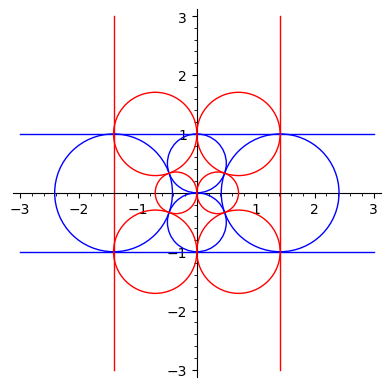

In [22]:
c1 = line([(-3, 1), (3, 1)])
c2 = line([(-3, -1), (3, -1)])
c3 = circle((-sqrt(2), 0), 1)
c4 = circle((sqrt(2), 0), 1)
c5 = circle((0, 1/2), 1/2)
c6 = circle((0, -1/2), 1/2)

b1 = line([(-sqrt(2), -3), (-sqrt(2), 3)], rgbcolor=(1, 0, 0))
b2 = line([(sqrt(2), -3), (sqrt(2), 3)], rgbcolor=(1, 0, 0))

x, y, r = circle_from_points((sqrt(2) / 3, 1 / 3), (0, 1), (sqrt(2), 1))
print('({}, {})'.format(x, y))
print(1 / r)

b3 = circle(( x,  y), r, rgbcolor=(1, 0, 0))
b4 = circle((-x,  y), r, rgbcolor=(1, 0, 0))
b5 = circle(( x, -y), r, rgbcolor=(1, 0, 0))
b6 = circle((-x, -y), r, rgbcolor=(1, 0, 0))

x, y, r = circle_from_points((sqrt(2) / 3, 1 / 3), (0, 0), (sqrt(2) / 3, -1 / 3))
print('({}, {})'.format(x, y))
print(1 / r)

b7 = circle(( x, y), r, rgbcolor=(1, 0, 0))
b8 = circle((-x, y), r, rgbcolor=(1, 0, 0))

show(c1 + c2 + c3 + c4 + c5 + c6 + b1 + b2 + b3 + b4 + b5 + b6 + b7 + b8)

# The quadratic form for the cubical packing

We first made a matrix, $W_c$, whose rows are the abbc coordinates of the circles in the root octuple. Then we found the row echelon form of that matrix, resulting in a system of linear relations the coordinates must satisfy. Then, from there, we could derive the rest of the coordinates from the first four (we chose the first four to be the "cubicle" from the Stange), allowing us to derive the quadratic form.

In [23]:
def abbc_coords(b, h1, h2):
    return [(h1^2 + h2^2 - 1) / b, b, h1, h2]

The idea here is that by multiplying $W_c$ by an arbitrary vector in $\mathbf{R}^8$ and setting that equal to $\vec{0}$, we can find a basis for the null space of $W_c$, which will end up giving us a bunch of linear relations the curvatures must satisfy. The thing to notice is that $W_c\vec{v} = 0$ for some $\vec{v}\in\mathbf{R}^8$ gives the system of equations with coefficient matrix $W^T$. So finding the row echelon form of $W^T$ will give us the coefficients in the simplified system of linear relations, with each row equal to 0.

In [24]:
Wc = matrix([
    [4, 0, 0, 1],
    [0, 2, 0, 1],
    [2, 1, -sqrt(2), -1],
    [2, 1, sqrt(2), -1],
    [2, 1, -sqrt(2), 1],
    [2, 1, sqrt(2), 1],
    [4, 0, 0, -1],
    [0, 2, 0, -1],
])

Wc.transpose().rref()

[   1    0    0    0  1/2  1/2  1/2 -1/2]
[   0    1    0    0  1/2  1/2 -1/2  1/2]
[   0    0    1    0  1/2 -1/2  1/2  1/2]
[   0    0    0    1 -1/2  1/2  1/2  1/2]

From here we can conclude that $$
\begin{align*}
    2b_1 &= -b_5 - b_6 - b_7 + b_8\\
    2b_2 &= -b_5 - b_6 + b_7 - b_8\\
    2b_3 &= -b_5 + b_6 - b_7 - b_8\\
    2b_4 &= b_5 - b_6 - b_7 - b_8
\end{align*}
$$
This differs slightly from Stange's system of equations because we put the circles in a slightly different order.

In any case, this gives us the tools to derive the full octuple from just four coordinates, letting us use those four coordinates to represent the entire octuple, and finally making $WPW^T$ nonsingular, allowing us to find the quadratic form the same way we did for the Descartes quadratic form and the octahedral quadratic form.

In [25]:
W = matrix([
    [4, 0, 0, 1],
    [0, 2, 0, 1],
    [2, 1, -sqrt(2), -1],
    [2, 1, sqrt(2), -1],
])

In [26]:
m = W * P * W.transpose()
m

[ 1 -3 -3 -3]
[-3  1 -3 -3]
[-3 -3  1 -3]
[-3 -3 -3  1]

In [27]:
32 * m.inverse() * 2/5

[   2 -6/5 -6/5 -6/5]
[-6/5    2 -6/5 -6/5]
[-6/5 -6/5    2 -6/5]
[-6/5 -6/5 -6/5    2]

In [28]:
W2 = matrix([
    [
        var('bt' + str(i)),
        var('b' + str(i)),
        var('h1' + str(i)),
        var('h2' + str(i)),
    ] for i in range(1, 5)
])
W2

[bt1  b1 h11 h21]
[bt2  b2 h12 h22]
[bt3  b3 h13 h23]
[bt4  b4 h14 h24]

In [29]:
D = W2.transpose() * m.inverse() * W2

In [30]:
32 * simplify(expand(D[1][1]))

5*b1^2 - 6*b1*b2 + 5*b2^2 - 6*b1*b3 - 6*b2*b3 + 5*b3^2 - 6*b1*b4 - 6*b2*b4 - 6*b3*b4 + 5*b4^2

This spits out the lovely quadratic form $$
    8(b_1^2 + b_2^2 + b_3^2 + b_4^2) = 3(b_1 + b_2 + b_3 + b_4)^2
.$$

Here's the generators for the Weyl group. They might or might not be generators for the packing itself, however.

In [31]:
S_i = weyl_generators(m.inverse(), standard_basis(4))
S_i

[
[ -1 6/5 6/5 6/5]  [  1   0   0   0]  [  1   0   0   0]
[  0   1   0   0]  [6/5  -1 6/5 6/5]  [  0   1   0   0]
[  0   0   1   0]  [  0   0   1   0]  [6/5 6/5  -1 6/5]
[  0   0   0   1], [  0   0   0   1], [  0   0   0   1],

[  1   0   0   0]
[  0   1   0   0]
[  0   0   1   0]
[6/5 6/5 6/5  -1]
]

In [32]:
(Wc * P * Wc.transpose()).rref()

[   1    0    0    0  1/2  1/2  1/2 -1/2]
[   0    1    0    0  1/2  1/2 -1/2  1/2]
[   0    0    1    0  1/2 -1/2  1/2  1/2]
[   0    0    0    1 -1/2  1/2  1/2  1/2]
[   0    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    0    0]

# Generalization of this method
This method seems remarkably general. Given a matrix representing a root unit of a packing, we can find the linear relation between the coordinates, and thus represent the packing with only four coordinates, allowing us to find the quadratic form.

In [33]:
def quadform_from_root(root_matrix):
    P = matrix([
        [0, -1/2, 0, 0],
        [-1/2, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
    ])
    
    # step 1: find linear relation between coords
    relation = root_matrix.transpose().rref() * vector([ var('b' + str(i)) for i in range(1, root_matrix.dimensions()[0] + 1)])
    
    # step 2: find matrix of quadratic form
    W = root_matrix[-4:]
    M = W * P * W.transpose()
    
    # step 3: repeat with arbitrary matrix
    W2 = matrix([
        [
            var('bt' + str(i)),
            var('b' + str(i)),
            var('h1' + str(i)),
            var('h2' + str(i)),
        ] for i in range(1, 5)
    ])
    D = factor(simplify(expand(W2.transpose() * M.inverse() * W2)))
    
    return relation, M.inverse(), D[1][1]

In [34]:
# cubical
relation, mat, equation = quadform_from_root(Wc)
print(2 * relation)
print(32 * mat)
print(32 * equation)
weyl_generators(32 * mat, standard_basis(4))

(2*b1 + b5 + b6 + b7 - b8, 2*b2 + b5 + b6 - b7 + b8, 2*b3 + b5 - b6 + b7 + b8, 2*b4 - b5 + b6 + b7 + b8)
[ 5 -3 -3 -3]
[-3  5 -3 -3]
[-3 -3  5 -3]
[-3 -3 -3  5]
5*b1^2 - 6*b1*b2 + 5*b2^2 - 6*b1*b3 - 6*b2*b3 + 5*b3^2 - 6*b1*b4 - 6*b2*b4 - 6*b3*b4 + 5*b4^2


[
[ -1 6/5 6/5 6/5]  [  1   0   0   0]  [  1   0   0   0]
[  0   1   0   0]  [6/5  -1 6/5 6/5]  [  0   1   0   0]
[  0   0   1   0]  [  0   0   1   0]  [6/5 6/5  -1 6/5]
[  0   0   0   1], [  0   0   0   1], [  0   0   0   1],

[  1   0   0   0]
[  0   1   0   0]
[  0   0   1   0]
[6/5 6/5 6/5  -1]
]

In [35]:
# octahedral
relation, mat, equation = quadform_from_root(matrix([
    [2, 0, 0, 1],
    [2, 0, 0, -1],
    [-1, 1, 0, 0],
    [4, 2, 2*sqrt(2), -1],
    [4, 2, 2*sqrt(2), 1],
    [7, 1, 2*sqrt(2), 0],
]))
print(relation)
print(8 * mat)
print(8 * equation)
weyl_generators(8 * mat, standard_basis(4))

(b1 + b5 + b6, b2 - b5, b3 - b6, b4 + b5 + b6)
[ 1 -2 -2 -1]
[-2  4  0 -2]
[-2  0  4 -2]
[-1 -2 -2  1]
b1^2 - 4*b1*b2 + 4*b2^2 - 4*b1*b3 + 4*b3^2 - 2*b1*b4 - 4*b2*b4 - 4*b3*b4 + b4^2


[
[-1  4  4  2]  [ 1  0  0  0]  [ 1  0  0  0]  [ 1  0  0  0]
[ 0  1  0  0]  [ 1 -1  0  1]  [ 0  1  0  0]  [ 0  1  0  0]
[ 0  0  1  0]  [ 0  0  1  0]  [ 1  0 -1  1]  [ 0  0  1  0]
[ 0  0  0  1], [ 0  0  0  1], [ 0  0  0  1], [ 2  4  4 -1]
]

In [36]:
# tetrahedral
relation, mat, equation = quadform_from_root(matrix([
    [2, 0, 0, 1],
    [2, 0, 0, -1],
    [-1, 1, 0, 0],
    [3, 1, 2, 0]
]))
print(relation)
print(4 * mat)
print(4 * equation)
weyl_generators(4 * mat, standard_basis(4))

(b1, b2, b3, b4)
[ 1 -1 -1 -1]
[-1  1 -1 -1]
[-1 -1  1 -1]
[-1 -1 -1  1]
b1^2 - 2*b1*b2 + b2^2 - 2*b1*b3 - 2*b2*b3 + b3^2 - 2*b1*b4 - 2*b2*b4 - 2*b3*b4 + b4^2


[
[-1  2  2  2]  [ 1  0  0  0]  [ 1  0  0  0]  [ 1  0  0  0]
[ 0  1  0  0]  [ 2 -1  2  2]  [ 0  1  0  0]  [ 0  1  0  0]
[ 0  0  1  0]  [ 0  0  1  0]  [ 2  2 -1  2]  [ 0  0  1  0]
[ 0  0  0  1], [ 0  0  0  1], [ 0  0  0  1], [ 2  2  2 -1]
]

I suspect that it is highly dependent on the order of the circles in the root. Interestingly, it looks like the only relation it was able to deduce for the tetrahedral packing is $b_1, b_2, b_3, b_4 = 0$, meaning there is no null space, as we'd expect. The octahedral quadratic form we get is very different, which isn't surprising, I guess, since this is a very different coordinate system, but I'm not sure if it's right. It feels very strange, since it's only really two dimensional, rather than four, and it doesn't quite look like the equations hold up. But it does absolutely work for the tetrahedral packing, which is awesome.